# BioMed@DataScience
## Домашнее задание 6

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать в виде $\LaTeX$ в markdown-ячейках.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 25 баллов;
* Задача 2 &mdash; 30 баллов;
* Задача 3 &mdash; 100 баллов;

----

In [150]:
# Bot check

# HW_ID: bmds_hw6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [151]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, root_mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from time import time
from tqdm.notebook import tqdm
from typing import Tuple, List, Dict, Any, Optional

sns.set_theme(palette="Set2", font_scale=1.2)

### Ссылки на чат с ИИ

Если при решении задач использовался ИИ, укажите здесь ссылки.

1. https://chat.deepseek.com (1 пункт и частично в других задачах)
2. лекции от Александра Кладченко (2 пункт)


---
### Задача 1.

Исследуем Elastic-регрессию.

**1.** Визуализируйте множество, которое ограничивает коэффициенты в Elastic-регрессии.

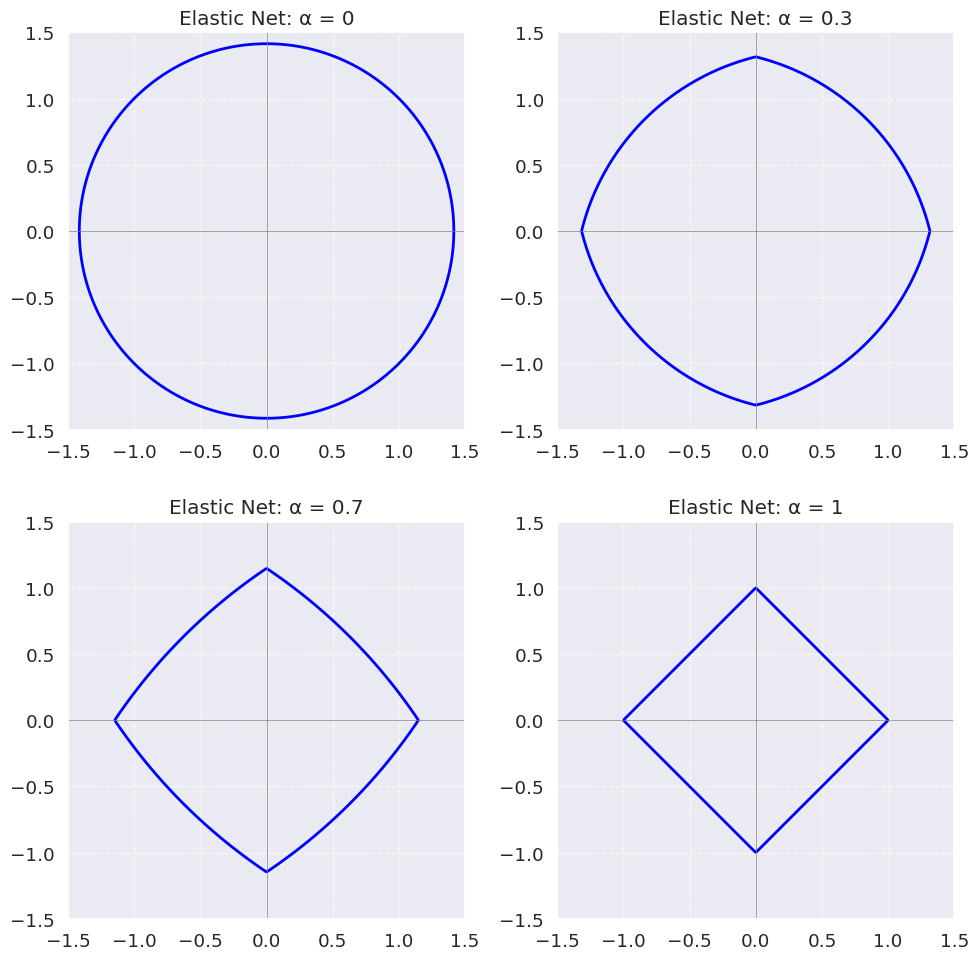

In [152]:
from matplotlib.patches import Ellipse, Rectangle

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
alphas = [0, 0.3, 0.7, 1]
t = 1

x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y)

for i, alpha in enumerate(alphas):
    ax = axes[i // 2, i % 2]

    # Elastic Net penalty: alpha * L1 + (1-alpha)/2 * L2
    Z = alpha * (np.abs(X) + np.abs(Y)) + (1 - alpha)/2 * (X**2 + Y**2)

    ax.contour(X, Y, Z, levels=[t], colors='blue', linewidths=2)

    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axhline(0, color='grey', lw=0.5)
    ax.axvline(0, color='grey', lw=0.5)
    ax.set_aspect('equal')
    ax.set_title(f'Elastic Net: α = {alpha}')
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**2.** Выпишите формулы для градиентного и стохастического спуска.

Градиентный спуск $$\theta _{t+1}=\theta _{t}-\alpha \nabla F(\theta _{t})$$

Стохастический спуск $$\theta_{t+1} = \theta_t - \eta \frac{1}{k} \sum_{j=1}^kx_{ij}(X_{ij}^T\theta_t - Y_{ij})$$, где $i_1, ..., i_k \sim U\{1,...,n\}$ и $F(\theta) = ||T-X\theta||^2 → min$

---
### Задача 2.

Рассмотрим модель логистической регрессии. Признаки объекта представимы в виде $d$-мерного вектора $x \in \mathbb{R}^d$, класс имеет бернулиевское распределение $Y \sim Bern(\mu_\theta(x))$. Мы делаем следующее предположение о зависимости параметра вероятности от признаков:
$${\mu_\theta(x) = \sigma(x^T\theta)= \cfrac{1}{1 + e^{-x^T\theta}}}.$$

Зададим регуляризацию через минимизацию следующего функционала:

$$F(\theta) = -\sum_{i=1}^n \left[Y_i \log{\sigma(\theta^T x_i)} + (1 - Y_i) \log{\left(1 - \sigma(\theta^T x_i)\right)}\right] + \lambda\theta^T \theta.$$

**1.** Выведите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

**2.** Покажите, что $F(\theta)$ &mdash; выпуклая функция по $\theta$ и, как следствие, имеет единственный экстремум, являющийся глобальным максимумом. *Указание*. Посчитайте гессиан (матрицу вторых производных) и покажите, что она положительно определена.

**3.** Опишите, как может вести себя решение при отсутствии регуляризации, то есть при $\lambda = 0$

1. $\frac{d\sigma}{dz} = σ(z)(1-σ(z))$

---
### Задача 3.


#### Введение


**РНК-интерференция** (англ. RNA interference; RNAi) &mdash; это естественный биологический процесс и перспективный с медицинской точки зрения метод подавления экспрессии генов в эукариотических клетках. Его применяют для изучения функций генов, [разработки новых лекарств](https://www.biopreparations.ru/jour/article/view/575?utm_source=chatgpt.com), а также при генной терапии.

Механизм РНК-интерференции работает так: поступившая в клетку экзогенная двухцепочечная РНК связывается с <abbr title="Рибонуклеазы (или РНК-азы) - ферменты-нуклеазы, катализирующие  расщепление РНК на более мелкие компоненты. Dicer относится к семеству РНКазы III.">рибонуклеазой Dicer</abbr>, которая нарезает ее на  ***малые интерферирующие РНК,*** **или миРНК**  **(small interfering RNA, siRNA)** &mdash; *небольшие фрагменты длиной 20–25 пар нуклеотидов*. Эти фрагменты взаимодействуют с <abbr title="RNA-induced silencing complex или RISC — мультибелковый комплекс, в состав которого входит один из белков семейства Argonaute и малые интерферирующие РНК. Белки Argonaute имеют эндонуклеазную активность по отношению к мРНК, комплементарным связанному фрагменту миРНК.">комплексом RISC</abbr>, который использует siRNA как «наводку» для поиска нужной молекулы мРНК и расщепляет её, подавляя работу гена.

> 📌 *Примечание.* В русскоязычной литературе аббревиатурой "миРНК" обозначают как siRNA, так и <abbr title="МикроРНК (miRNA) — это короткие эндогенные РНК, которые, подобно siRNA, подавляют экспрессию генов, но связываются они с мРНК частично комплементарно, регулируя множество мишеней и подавляя трансляцию, а не вызывая прямую деградацию.">miRNA (микро-РНК)</abbr>, что нередко приводит к путанице. Условимся, под миРНК мы будем иметь в виду именно *малые интерферирующие РНК (siRNA)*.


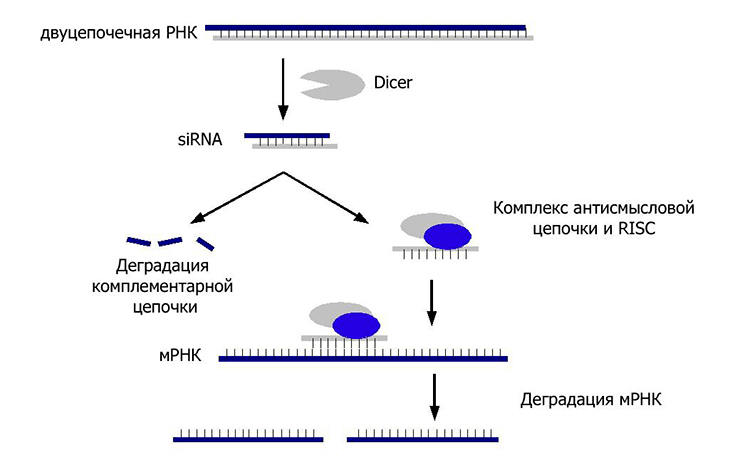



**Проблема**

Не все миРНК одинаково эффективны в подавлении экспрессии генов. Способность миРНК к ингибированию измеряется с помощью количественной <abbr title="ПЦР с обратной транскрипцией">ОТ-ПЦР</abbr>, *однако* существуют гипотезы, что определенные характеристики олигонуклеотидов могут предсказать их эффективность.

**Описание датасета**

[Датасет](https://www.kaggle.com/datasets/livtoft/sirna-activity/data) содержит 653 олигонуклеотида, информацию о целевой мРНК, последовательности миРНК, а также характеристики, которые могут быть предикторами активности миРНК.

* `target mRNA` &mdash; идентификатор целевой мРНК.

* `Start / End` &mdash; начальная и конечная позиции миРНК на целевой мРНК.

* `Sequence` &mdash; последовательность нуклеотидов в миРНК.

* `G / U` &mdash; количество нуклеотидов гуанина (G) и урацила (U) в миРНК.

* `bi` &mdash; стабильность димеров антисмысловой цепи (энергия связи между одинаковыми цепями).

* `uni` &mdash; внутримолекулярная стабильность антисмысловой цепи (способность цепи формировать петли или шпильки).

* `duplex` &mdash; энергия связи между антисмысловой и смысловой цепями миРНК (чем меньше, тем прочнее комплекс).

* `Pos1,2,6,13,14,18` &mdash; стабильность связи пар оснований в ключевых позициях siRNA при взаимодействии с мРНК.
* `Dif_5-3` &mdash; разница стабильности концов миРНК (5' и 3').

* `Content+ / Content-` &mdash; содержание нуклеотидов на положительной и отрицательной цепи.

* `Cons+ / Cons- / Cons_Sum` &mdash; консервативность последовательностей (на положительной, отрицательной цепи и суммарно).

* `Hyb19` &mdash; энергия гибридизации с мРНК (длина 19 пар оснований).

* `target` &mdash; цель (идентификатор).

* `Activity` &mdash; процент остаточной экспрессии целевой мРНК. **Чем меньше активность, тем выше эффективность подавления экспрессии гена.**

Согласно [оригинальной статье](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-65#Tab1), эти признаки должны помочь выявлять миРНК, наиболее эффективно подавляющие экспрессию гена.

**1.** **Загрузка и подготовка данных**

Загрузите датасет и выведите его размер и первые несколько строк.

In [153]:
data = pd.read_csv("data.csv")
data.head()

,Target seq,Start,End,Sequence,G,U,bi,uni,duplex,Pos1,...,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Activity
0,M60857,195,213,AUUAUCCACUGUUUUUGGA,3,9,-7.0,-1.9,-28.1,-1.1,...,-2.4,-1.3,2,6,2,6,4,0.001175,-8.1,24.7
1,M60857,197,215,AAAUUAUCCACUGUUUUUG,2,9,-0.7,0.0,-24.2,-0.9,...,-2.1,-1.2,1,6,1,5,4,0.001175,-8.1,9.8
2,M60857,199,217,CAAAAUUAUCCACUGUUUU,1,8,-1.5,0.0,-24.2,-2.1,...,-0.9,1.2,2,5,3,2,-1,0.001175,-11.4,50.5
3,M60857,201,219,CACAAAAUUAUCCACUGUU,1,6,-0.6,0.0,-26.7,-2.1,...,-0.9,1.2,3,3,3,3,0,0.001175,-14.5,83.7
4,M60857,203,221,GCCACAAAAUUAUCCACUG,2,4,-0.1,0.0,-30.3,-3.4,...,-2.1,1.3,4,2,2,3,1,0.001175,-17.8,60.3


Проверьте, есть ли в данных пропуски? Все ли столбцы имеют числовой формат?

In [154]:
data.isna().sum()

,0
Target seq,0
Start,0
End,0
Sequence,0
G,0
U,0
bi,0
uni,0
duplex,0
Pos1,0


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Target seq  653 non-null    object 
 1   Start       653 non-null    int64  
 2   End         653 non-null    int64  
 3   Sequence    653 non-null    object 
 4   G           653 non-null    int64  
 5   U           653 non-null    int64  
 6   bi          653 non-null    float64
 7   uni         653 non-null    float64
 8   duplex      653 non-null    float64
 9   Pos1        653 non-null    float64
 10  Pos2        653 non-null    float64
 11  Pos6        653 non-null    float64
 12  Pos13       653 non-null    float64
 13  Pos14       653 non-null    float64
 14  Pos18       653 non-null    float64
 15  Dif_5-3     653 non-null    float64
 16  Content+    653 non-null    int64  
 17  Content-    653 non-null    int64  
 18  Cons+       653 non-null    int64  
 19  Cons-       653 non-null    i

**Ответ:** пропусков нет, не все столбцы имеют числовой формат.

Отличается ли масштаб у числовых признаков?

In [156]:
data.describe()

,Start,End,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,...,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Activity
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,...,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,972.715161,990.715161,4.362940,5.422665,-7.446095,-1.106432,-34.111639,-2.060337,-2.086371,-2.149923,...,-2.174119,-0.113783,3.267994,3.165391,3.866769,3.687596,-0.179173,0.000628,-15.422052,42.473858
std,769.976871,769.976871,1.975689,2.326608,4.678564,1.491547,4.365093,0.763692,0.768782,0.762777,...,0.772666,1.043763,1.852747,2.086378,1.660350,1.554861,2.769808,0.000386,6.661961,31.139170
min,1.000000,19.000000,0.000000,0.000000,-26.600000,-7.900000,-49.900000,-3.400000,-3.400000,-3.400000,...,-3.400000,-2.500000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000089,-37.200000,0.000000
25%,329.000000,347.000000,3.000000,4.000000,-9.900000,-1.900000,-36.700000,-2.400000,-2.400000,-2.400000,...,-2.400000,-1.000000,2.000000,2.000000,3.000000,3.000000,-2.000000,0.000335,-20.100000,16.100000
50%,779.000000,797.000000,4.000000,5.000000,-7.000000,-0.300000,-33.700000,-2.100000,-2.100000,-2.100000,...,-2.100000,0.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000549,-14.600000,36.110000
75%,1504.000000,1522.000000,6.000000,7.000000,-4.000000,0.000000,-31.000000,-1.300000,-1.300000,-2.100000,...,-2.100000,0.300000,4.000000,4.000000,5.000000,5.000000,2.000000,0.000779,-10.600000,61.913592
max,5524.000000,5542.000000,12.000000,13.000000,4.100000,0.000000,-22.300000,-0.900000,-0.900000,-0.900000,...,-0.900000,2.400000,12.000000,10.000000,9.000000,8.000000,7.000000,0.002350,0.000000,127.800000


**Ответ:** масштаб сильно отличается.

Посмотрим на распределение активности:

<Axes: xlabel='Activity', ylabel='Count'>

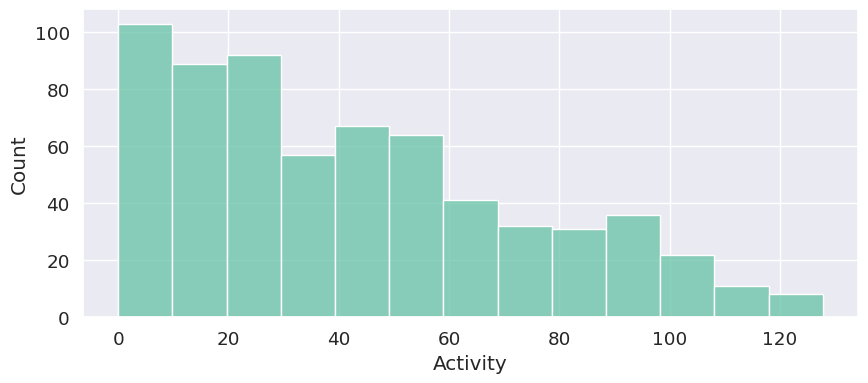

In [157]:
plt.figure(figsize=(10, 4))
sns.histplot(data["Activity"])

Удивление могут вызывать значения активности свыше 100%. Как будто бы в некоторых случаях последовательность миРНК вместо подавления, напротив, усиливала экспрессию мРНК. Эта тайна, покрытая мраком, остаётся на совести экспериментаторов 🤔. Более важно научиться предсказывать эффективные последовательности, при применении которых остаточная активность мала. В качестве порогового значения возьмём 30% и будем пытаться отделять (классифицировать) эффективные и неэффективные цепочки миРНК по такому правилу:

*   1 (эффективная): миРНК снижает уровень мРНК более чем на 70% (значение активности ≤ 30%).

*   0 (неэффективная): миРНК снижает уровень мРНК менее чем на 30% (значение активности > 30%).

Установите порог, выделите матрицу признаков и целевую переменную:

In [158]:
threshold = 30
data['is_effective'] = (data['Activity'] <= threshold).astype(int)

X = data.drop(['Target seq', 'Start', 'End', 'Sequence', 'Activity', 'is_effective'], axis=1)
y = data['is_effective']

Посчитайте количество нулей и единиц таргете (не путать с признаком `target`). Лучше всего представить ответ в виде графика с двумя столбцами, высота которых соответствует количеству объектов класса (см. например, [`sns.countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html)). Есть ли дисбаланс между классами?

Класс 0 (неэффективные): 360 миРНК
Класс 1 (эффективные): 293 миРНК


/tmp/ipython-input-3352794261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette=['red', 'green'])


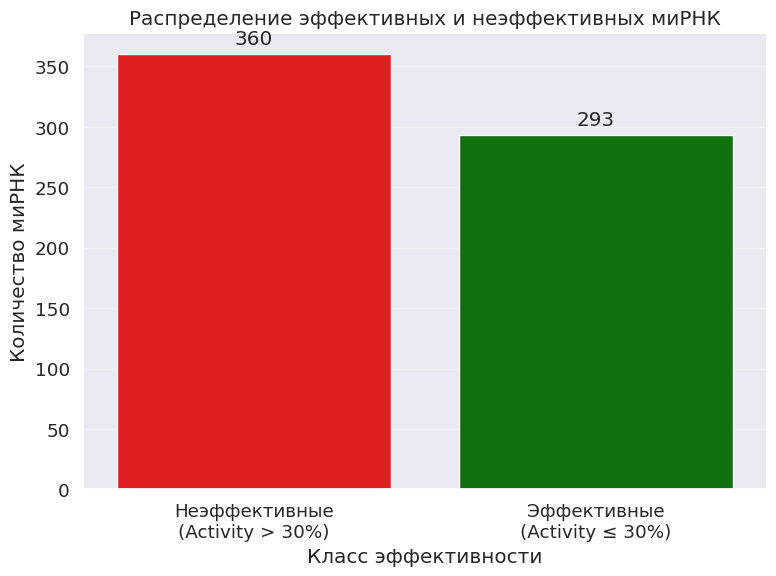

In [159]:
class_counts = y.value_counts()
print(f"Класс 0 (неэффективные): {class_counts[0]} миРНК")
print(f"Класс 1 (эффективные): {class_counts[1]} миРНК")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y, palette=['red', 'green'])
plt.title('Распределение эффективных и неэффективных миРНК')
plt.xlabel('Класс эффективности')
plt.ylabel('Количество миРНК')
plt.xticks([0, 1], ['Неэффективные\n(Activity > 30%)', 'Эффективные\n(Activity ≤ 30%)'])

for i, count in enumerate(class_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Ответ:** неэффективных миРНК 55.1%, эффективных 44.9%. Это говорит об умеренном дисбалансе

Разделите данные на обучающую и тестовую выборки в отношении 3:2. Вам не подойдет стандартный метод `test_train_split`, так как в данных есть группы (столбец `Target seq`): для каждой целевой последовательности подбирались различные цепочки миРНК:

Text(0.5, 1.0, 'Количество записей в данных по всем последовательностям (группам)')

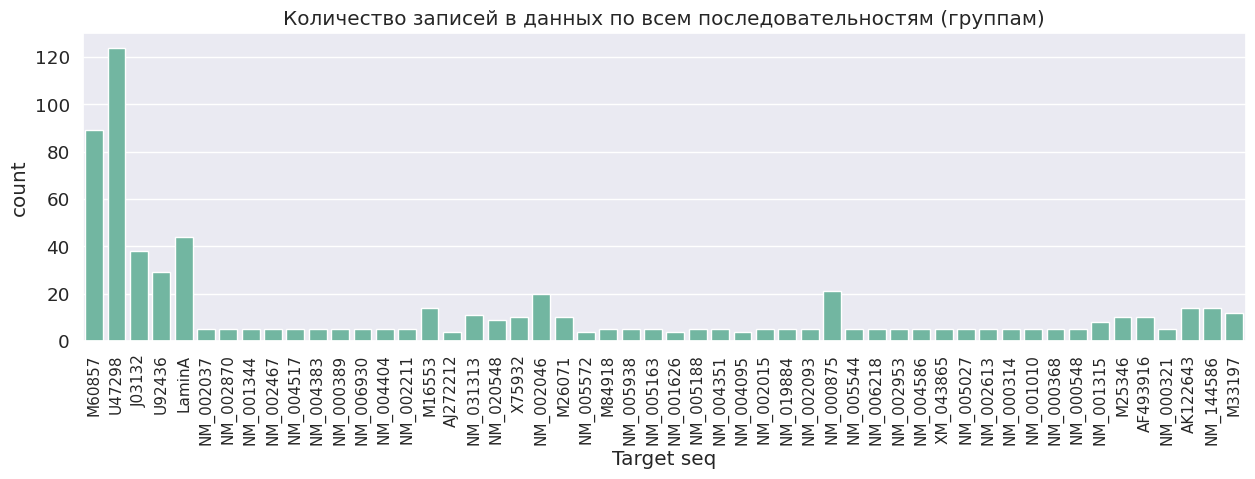

In [160]:
groups = data["Target seq"]

plt.figure(figsize=(15, 4))
sns.countplot(x=groups)
plt.xticks(rotation=90, fontsize=11)
plt.title("Количество записей в данных по всем последовательностям (группам)")

Реализуйте функцию для разделения выборки на трейн и тест так, чтобы каждая отдельная группа целиком попала либо в обучающую, либо в тестовую часть. Вы можете реализовать алгоритм самостоятельно или воспользоваться готовыми решениями, например [`GroupShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html), используя метод `groups`.

In [161]:
from sklearn.model_selection import GroupShuffleSplit

groups = data["Target seq"]
train_idx, test_idx = next(GroupShuffleSplit(n_splits=1, test_size=0.4, random_state=42).split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

Выведите что-либо, подтверждающее корректность вашего разбиения.

Чем плоха ситуация, если элементы выборки, соответствующие одной и той же целевой последовательности, попадут одновременно в тестовую и обучающую части?

In [162]:
train_groups = set(data.iloc[train_idx]["Target seq"].unique())
test_groups = set(data.iloc[test_idx]["Target seq"].unique())
common_groups = train_groups & test_groups

common_groups

set()

**Ответ:** set() значит, что количество пересекающихся элементов равно 0, а это значит, что разбиение корректно!

Если элементы выборки, соответствующие одной и той же целевой последовательности, попадут одновременно в тестовую и обучающую части модель станет бесполезной для реального применения, так как она не будет учиться не общим принципам, а просто запоминать особенности уже отдельных известных целевых последовательностей. То есть будет риск того, что обучение будет неверным или случится переобучение.

Аналогичным образом, выведите распределение таргета по классам для обеих выборок. Одинаково ли соотношение классов в обучающей и тестовой частях?

In [163]:
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

train_pct = y_train.value_counts(normalize=True) * 100
test_pct = y_test.value_counts(normalize=True) * 100

print('TRAIN:')
print(f"Неэффективные: {train_counts[0]} samples ({train_pct[0]:.1f}%)")
print(f"Эффективные: {train_counts[1]} samples ({train_pct[1]:.1f}%)")

print('TEST:')
print(f"Неэффективные: {test_counts[0]} samples ({test_pct[0]:.1f}%)")
print(f"Эффективные: {test_counts[1]} samples ({test_pct[1]:.1f}%)")

TRAIN:
Неэффективные: 227 samples (54.4%)
Эффективные: 190 samples (45.6%)
TEST:
Неэффективные: 133 samples (56.4%)
Эффективные: 103 samples (43.6%)


**Ответ:** соотношение классов в обучающей и тестовой частях приблизительно одинаково, но разница очень незначительна, чтобы помешать модели

Далее, при построении классификатора, учитывайте диcбаланс, если он есть: используйте взвешенную версию логистической регрессии (см. параметр `class_weight`) и метрику [`balanced_accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score) для оценки качества модели. **❗Это очень важно❗**

Стандартизируйте данные.

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Хорошо ли обусловлена матрица $X$? О чём это говорит?

In [165]:
condition_number = np.linalg.cond(X_train_scaled)
print(f"Число обусловленности матрицы X: {condition_number:.2e}")

Число обусловленности матрицы X: 1.06e+16


**Ответ:** матрица плохо обусловлена, скорее всего из-за мультиколлениарности

Для наглядности, выведите матрицу корреляций. Что означают элементы матрицы? А в нашем случае?

In [166]:
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
correlation_matrix = X_train_df.corr()

correlation_matrix

,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target
G,1.000000,-0.371085,-0.561532,-0.499250,-0.530045,-0.224826,-0.143557,-0.191880,-0.149593,-0.125753,-0.214026,0.007236,0.481121,-0.470377,0.420166,-0.326048,-0.424900,-0.034897,-0.085842
U,-0.371085,1.000000,0.211050,0.224863,0.603610,0.190881,0.166024,0.221166,0.179781,0.136660,0.236569,0.033177,-0.673127,0.845849,-0.404499,0.396629,0.455386,0.083328,0.401233
bi,-0.561532,0.211050,1.000000,0.635635,0.443518,0.179429,0.262996,0.160335,0.135140,0.142909,0.010770,-0.120488,-0.370803,0.254633,-0.286564,0.214194,0.285214,-0.029480,0.107780
uni,-0.499250,0.224863,0.635635,1.000000,0.485301,0.247697,0.290300,0.125484,0.165604,0.174247,0.067829,-0.128368,-0.403209,0.234466,-0.285704,0.217805,0.286739,-0.068469,0.097783
duplex,-0.530045,0.603610,0.443518,0.485301,1.000000,0.356834,0.396979,0.361921,0.211169,0.252273,0.295502,-0.043159,-0.594598,0.480122,-0.375400,0.304059,0.386769,-0.107954,0.495206
Pos1,-0.224826,0.190881,0.179429,0.247697,0.356834,1.000000,0.421683,0.080727,-0.019863,0.039537,0.023740,-0.697511,-0.232218,0.152915,-0.327116,0.340055,0.379077,-0.089738,0.169818
Pos2,-0.143557,0.166024,0.262996,0.290300,0.396979,0.421683,1.000000,0.076843,-0.075991,0.054016,-0.003487,-0.303803,-0.221814,0.133379,-0.134729,0.199473,0.189399,-0.070499,0.175724
Pos6,-0.191880,0.221166,0.160335,0.125484,0.361921,0.080727,0.076843,1.000000,-0.035177,-0.043160,0.056387,-0.017264,-0.221515,0.199495,-0.406458,0.216973,0.355919,0.030219,0.151357
Pos13,-0.149593,0.179781,0.135140,0.165604,0.211169,-0.019863,-0.075991,-0.035177,1.000000,0.379419,0.003163,0.016460,-0.162035,0.177038,-0.359055,0.362854,0.410264,-0.075644,0.178264
Pos14,-0.125753,0.136660,0.142909,0.174247,0.252273,0.039537,0.054016,-0.043160,0.379419,1.000000,-0.059391,-0.070820,-0.231549,0.108196,-0.208603,0.222652,0.244985,-0.123038,0.229041


**Ответ:** матрица корреляции показывает попарные линейные зависимости между признаками, каждый элемент $r_{ij}$ - это корреляция между признаком $i$ и признаком $j$.

В нашем случае она показывает взаимосвязь между различными биологическими характеристиками.

Делать предобработку вручную не вполне удобно и правильно. Гораздо лучше использовать пайплайн. Для этого зададим порядок выполнения преобразований так, как этого требует объект типа [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). В нашем случае это единственное преобразование:

In [167]:
preproc_steps = [
    ('scaler', StandardScaler())
]

Теперь для создания пайплайна достаточно добавить саму модель как четвёртый шаг:


```
model = Pipeline(
    steps=preproc_steps + [
        ('estimator', <Инизиализированная модель>)
    ]
)
```

Такой подход является более надёжным и удобным.

**2.** **Модельки, модельки, модельки...**

**2.1** **Самый популярный класс**

Найдите самый популярный класс в обучающей выборке и посчитайте точность ответа на трейне и тесте только этим классом &mdash; константой. Отличается ли взвешенная точность от обычной?

In [168]:
most_frequent_class = y_train.mode()[0]
print(most_frequent_class)

0


In [169]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

y_train_const = np.full_like(y_train, most_frequent_class)
y_test_const = np.full_like(y_test, most_frequent_class)

train_acc = accuracy_score(y_train, y_train_const)
test_acc = accuracy_score(y_test, y_test_const)
train_bal_acc = balanced_accuracy_score(y_train, y_train_const)
test_bal_acc = balanced_accuracy_score(y_test, y_test_const)

print(train_acc, train_bal_acc)
print(test_acc, test_bal_acc)

0.5443645083932853 0.5
0.5635593220338984 0.5


**Вывод:** самый популярный класс в обучающей выборке - неэффективные миРНК, что нормально для наших данных. Взвешенная точность от обычной отличается незначительно.

**2.2** **Логистическая регрессия без регуляризации**

Обучите классическую логистическую регрессию и выведите точность ответа на трейне и тесте.

><details>
>  <summary>  Подсказка ✍️</summary>
>  Чему равен аргумент `penalty` по умолчанию?
 </details><br/>

In [170]:
model_no_reg = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(
        penalty=None, class_weight='balanced', random_state=42, max_iter=1000))])

model_no_reg.fit(X_train, y_train)

y_pred_train = model_no_reg.predict(X_train)
y_pred_test = model_no_reg.predict(X_test)
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train):.3f}, Test accuracy: {accuracy_score(y_test, y_pred_test):.3f}")

Train accuracy: 0.755, Test accuracy: 0.640


**Вывод:** на трейне точность предсказания 75.5%, на тесте 64%, значит модель переобучается.

**2.3** **Логистическая регрессия с регуляризацией**

За что отвечает гиперпараметр `C` у класса `LogisticRegression`?

**Ответ:** `C` управляет "силой" штрафа. Обратная величина к $α$.

Вам необходимо исследовать зависимость от `C` следующих величин:
1. Accuracy на трейне
2. Accuracy на тесте
3. Коэффициенты модели

Чтобы не приходилось постоянно обучать модели при одних и тех же сетках `C`, предлагается написать функцию, которая будет принимать на вход вид штрафа `penalty`, границы диапазона `C`, и саму выборку. На каждой итерации вычисляйте все величины и сохраняйте в виде списков. Для мониторинга времени работы используйте функцию `tqdm`.

Не забудьте также про дисбаланс классов, если он имеется.

In [171]:
def train_alpha_grid(
    log_C_bounds: Tuple[float, float],
    resolution: int,
    data: Dict[str, Any],
    preproc_steps: List[Tuple[str, Any]],
    penalty: str = 'none',
    solver: str = 'newton-cholesky',
    max_iter: int = 100,
) -> Tuple[List[np.ndarray], List[float], List[float]]:
    """Обучает модель LogisticRegression для разных значений параметра регуляризации C,
    сохраняет коэффициенты, вычисляет accuracy на обучающей и тестовой выборках.

    Args:
        log_C_bounds (Tuple[float, float]): кортеж с минимальным и максимальным значением log10(C) для сетки.
        resolution (int): число точек на сетке C.
        data (dict): словарь с обучающей и тестовой выборками (например, {'X_train': ..., 'y_train': ..., 'X_test': ..., 'y_test': ...}).
        preproc_steps (List[Tuple[str, Any]]): список шагов пайплайна.
        penalty (str): тип регуляризации ('l1', 'l2', 'elasticnet', 'none').
        solver (str): метод оптимизации параметров модели (см. аргумент `solver` у класса LogisticRegression).
        max_iter (int): обучение останавливается, если требуемая точность не достигнута за max_iter итераций.

    Returns:
        coefs_list (List[np.ndarray]): список массивов коэффициентов для каждого значения C.
        acc_train_list (List[float]): список accuracy на обучающей выборке для каждого значения C.
        acc_test_list (List[float]): список accuracy на тестовой выборке для каждого значения C.
    """

    X_train, y_train, X_test, y_test = data['X_train'], data['y_train'], data['X_test'], data['y_test']

    C_values = np.logspace(log_C_bounds[0], log_C_bounds[1], resolution)

    coefs_list = []
    acc_train_list = []
    acc_test_list = []

    for C in tqdm(C_values, desc=f"Training (penalty={penalty})"):
        try:
            model = Pipeline(steps=preproc_steps + [('estimator', LogisticRegression(
                        C=C, penalty=penalty, class_weight='balanced', solver=solver, random_state=42, max_iter=max_iter))])

            model.fit(X_train, y_train)

            coefs = model.named_steps['estimator'].coef_[0]
            coefs_list.append(coefs)

            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            acc_train = accuracy_score(y_train, y_train_pred)
            acc_test = accuracy_score(y_test, y_test_pred)

            acc_train_list.append(acc_train)
            acc_test_list.append(acc_test)

        except Exception as e:
            print(f"Ошибка при C={C:.2e}: {e}")
            coefs_list.append(np.zeros(X_train.shape[1]))
            acc_train_list.append(0.0)
            acc_test_list.append(0.0)
            continue

    return coefs_list, acc_train_list, acc_test_list, C_values

Проведите эксперимент для 3-х разных моделей логистической регрессии с различными типами регуляризации:
1.  $L_1$-регуляризация
2.  $L_2$-регуляризация
3.  Комбинированная регуляризация с параметром `l1_ratio=0.5`.

>*Рекомендации*
>*   Подберите диапазоны значений для гиперпараметра `C`. Не берите слишком узкие, чтобы видеть на графике всю картину. Для слишком широких границ придётся брать больше точек.
>*   Вам не нужна очень частая сетка гиперпараметра `C`. При отладке кода можно вообще использовать сетку из 2-3 значений.
>*   Вы можете столкнуться с различными ошибками и `warning`-ами (например, неверный `solver`, отсутствие сходимости,  и т.д.). Постарайтесь настроить гиперпараметры модели таким образом, чтобы ошибки исчезли, а количество предупреждений было минимальным.

In [172]:
results = {}

#L1 -регуляризация
coefs_l1, acc_train_l1, acc_test_l1, C_values_l1 = train_alpha_grid(
    log_C_bounds=(-3, 2), resolution=15,
    data={'X_train': X_train, 'y_train': y_train, 'X_test': X_test, 'y_test': y_test},
    preproc_steps=preproc_steps,
    penalty='l1', solver='liblinear', max_iter=2000
)
results['l1'] = {'coefs': coefs_l1, 'acc_train': acc_train_l1, 'acc_test': acc_test_l1, 'C_values': C_values_l1}

#L2 -регуляризация
coefs_l2, acc_train_l2, acc_test_l2, C_values_l2 = train_alpha_grid(
    log_C_bounds=(-4, 4), resolution=15,
    data={'X_train': X_train, 'y_train': y_train, 'X_test': X_test, 'y_test': y_test},
    preproc_steps=preproc_steps,
    penalty='l2', solver='lbfgs', max_iter=1000
)
results['l2'] = {'coefs': coefs_l2, 'acc_train': acc_train_l2, 'acc_test': acc_test_l2, 'C_values': C_values_l2}

#Комбинированная регуляризация с параметром l1_ratio=0.5
coefs_elasticnet, acc_train_elasticnet, acc_test_elasticnet, C_values_elasticnet = train_alpha_grid(
    log_C_bounds=(-4, 4), resolution=15,
    data={'X_train': X_train, 'y_train': y_train, 'X_test': X_test, 'y_test': y_test},
    preproc_steps=preproc_steps,
    penalty='elasticnet', solver='saga', max_iter=5000
)
results['elasticnet'] = {'coefs': coefs_elasticnet, 'acc_train': acc_train_elasticnet, 'acc_test': acc_test_elasticnet, 'C_values': C_values_elasticnet}

Training (penalty=l1):   0%|          | 0/15 [00:00<?, ?it/s]

Training (penalty=l2):   0%|          | 0/15 [00:00<?, ?it/s]

Training (penalty=elasticnet):   0%|          | 0/15 [00:00<?, ?it/s]

Ошибка при C=1.00e-04: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=3.73e-04: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=1.39e-03: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=5.18e-03: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=1.93e-02: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=7.20e-02: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=2.68e-01: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=1.00e+00: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=3.73e+00: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=1.39e+01: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=5.18e+01: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=1.93e+02: l1_ratio must be specified when penalty is elasticnet.
Ошибка при C=7.20e+02: l1_ratio must be specified when penalty i

Нарисуйте треки соответствующих коэффициентов моделей в зависимости от `C`. Свободный коэффициент тоже стоит добавить на графики. Легенду можно сделать общую, если все графики помещаются на экране. Отразите в ней наименования признаков для соответствующих коэффициентов. Сделать красиво могут помочь заметки [отсюда](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot).

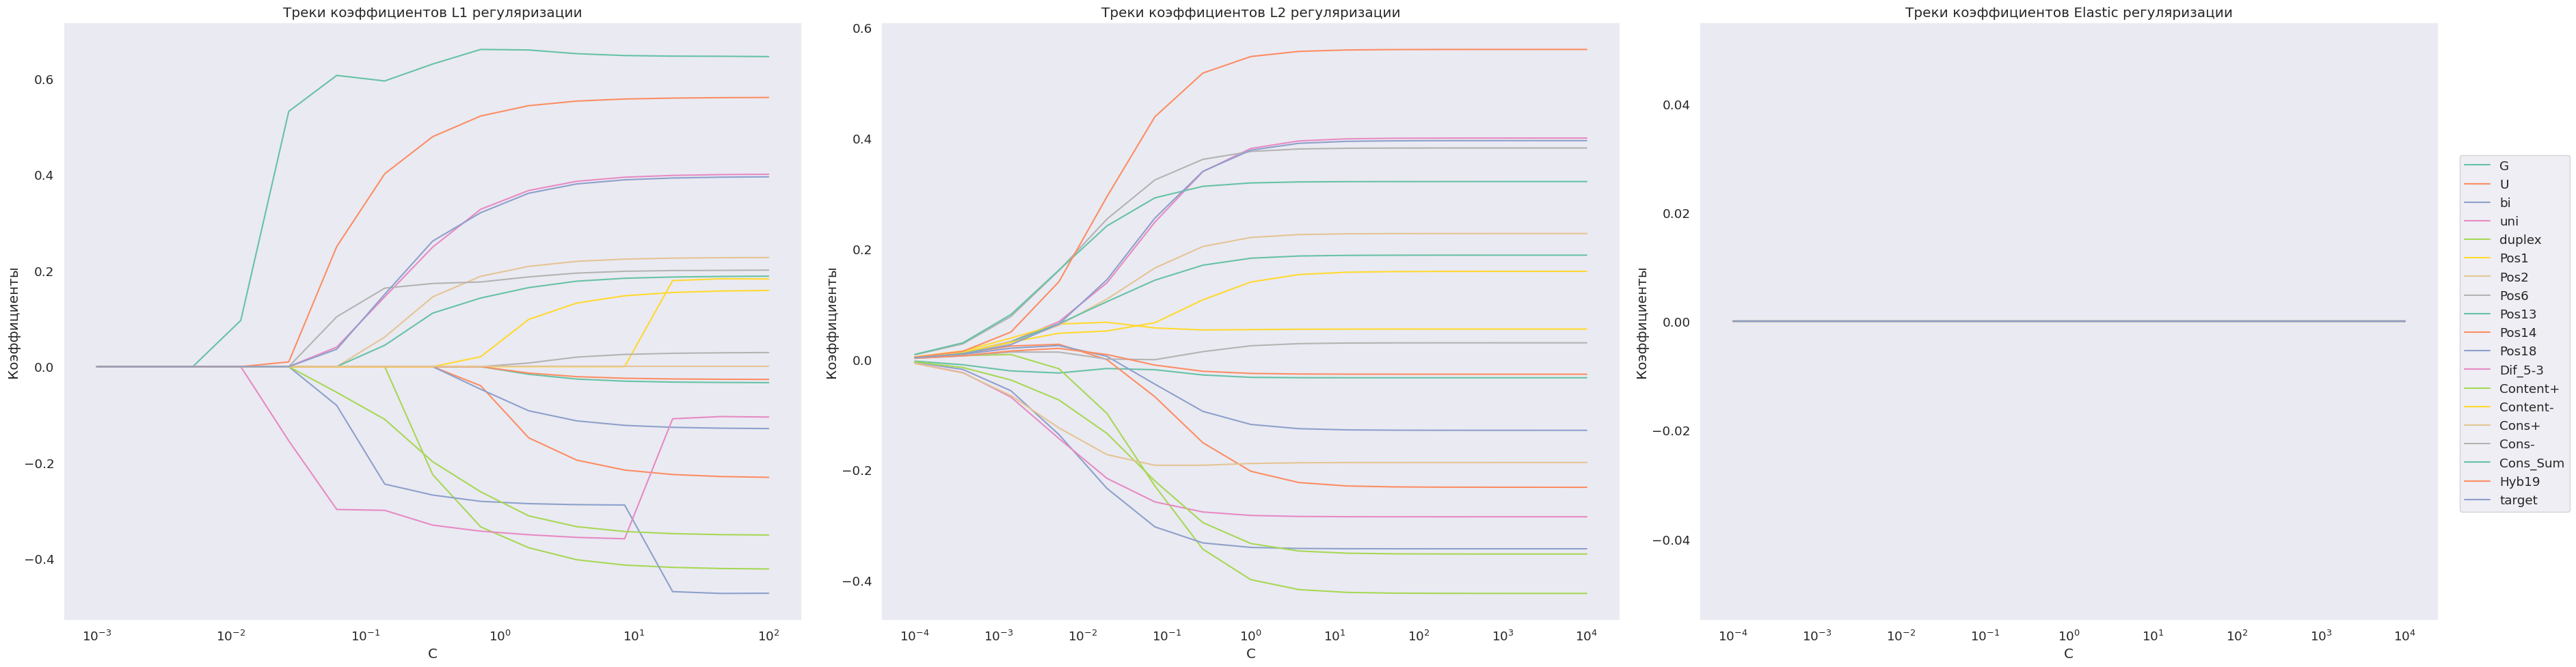

In [173]:
fig, axes = plt.subplots(1, 3, figsize=(36, 10))

#L1 - регуляризация
ax = axes[0]
C_values_l1 = results['l1']['C_values']
coefs_l1 = np.array(results['l1']['coefs'])
for i in range(coefs_l1.shape[1]):
    ax.plot(C_values_l1, coefs_l1[:, i], label=X_train.columns[i])
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Коэффициенты')
ax.set_title('Треки коэффициентов L1 регуляризации')
ax.grid()

#L2 - регуляризация
ax = axes[1]
C_values_l2 = results['l2']['C_values']
coefs_l2 = np.array(results['l2']['coefs'])
for i in range(coefs_l2.shape[1]):
    ax.plot(C_values_l2, coefs_l2[:, i], label=X_train.columns[i])
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Коэффициенты')
ax.set_title('Треки коэффициентов L2 регуляризации')
ax.grid()

#Elastic регуляризация
ax = axes[2]
C_values_elasticnet = results['elasticnet']['C_values']
coefs_elasticnet = np.array(results['elasticnet']['coefs'])
for i in range(coefs_elasticnet.shape[1]):
    ax.plot(C_values_elasticnet, coefs_elasticnet[:, i], label=X_train.columns[i])
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Коэффициенты')
ax.set_title('Треки коэффициентов Elastic регуляризации')
ax.grid()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

**Вывод:** Разные типы регуляризации решают разные задачи - L1 для отбора признаков и создания разреженных моделей, L2 для устойчивости и борьбы с мультиколлинеарностью, ElasticNet для баланса между ними.

Нарисуйте зависимости точности предсказания от `C` на обучающей и тестовой выборках. Скомпонуйте всё на 2-3 графиках. Горизонтальными линиями отметьте точность модели без регуляризации на тесте.

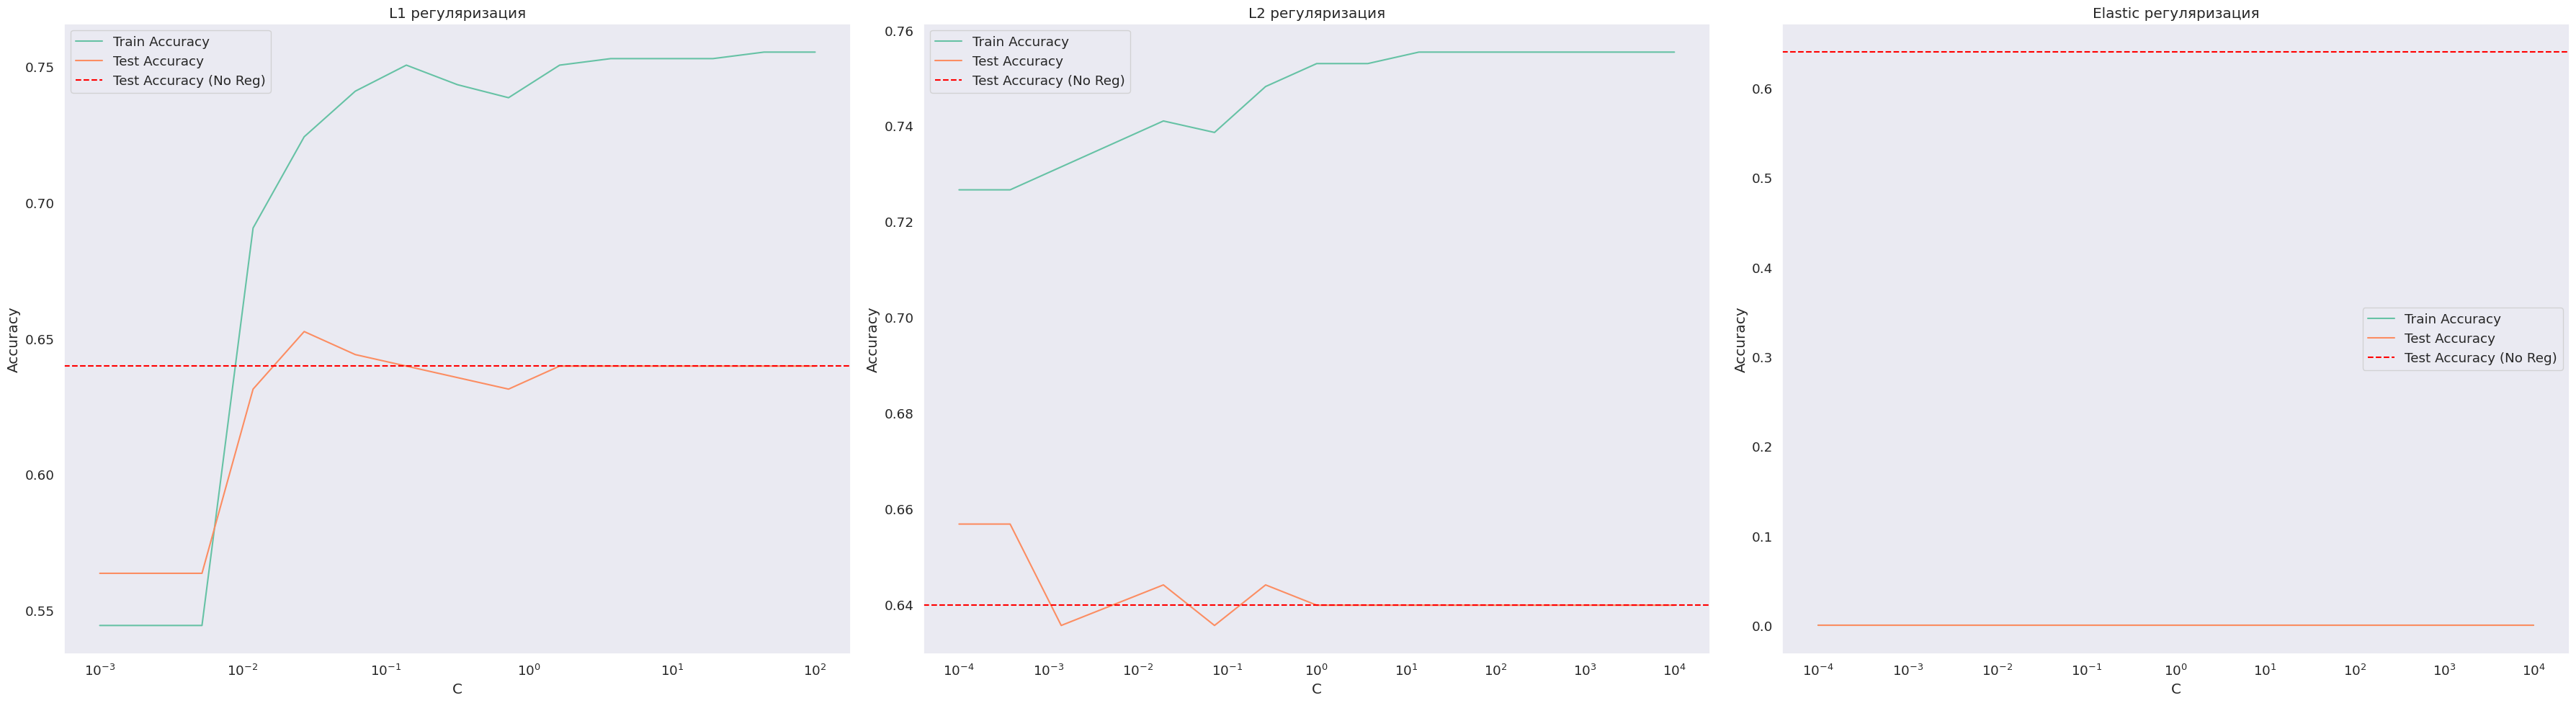

In [178]:
fig, axes = plt.subplots(1, 3, figsize=(36, 10))

model_no_reg = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(penalty=None, class_weight='balanced', random_state=42, max_iter=1000))
    ])
model_no_reg.fit(X_train, y_train)
y_pred_test_no_reg = model_no_reg.predict(X_test)
test_acc_no_reg = accuracy_score(y_test, y_pred_test_no_reg)

#L1 - регуляризация
ax = axes[0]
ax.plot(results['l1']['C_values'], results['l1']['acc_train'], label='Train Accuracy')
ax.plot(results['l1']['C_values'], results['l1']['acc_test'], label='Test Accuracy')
ax.axhline(test_acc_no_reg, color='red', linestyle='--', label='Test Accuracy (No Reg)')
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_title('L1 регуляризация')
ax.grid()
ax.legend()

#L1 - регуляризация
ax = axes[1]
ax.plot(results['l2']['C_values'], results['l2']['acc_train'], label='Train Accuracy')
ax.plot(results['l2']['C_values'], results['l2']['acc_test'], label='Test Accuracy')
ax.axhline(test_acc_no_reg, color='red', linestyle='--', label='Test Accuracy (No Reg)')
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_title('L2 регуляризация')
ax.grid()
ax.legend()

#Elastic регуляризация
ax = axes[2]
ax.plot(results['elasticnet']['C_values'], results['elasticnet']['acc_train'], label='Train Accuracy')
ax.plot(results['elasticnet']['C_values'], results['elasticnet']['acc_test'], label='Test Accuracy')
ax.axhline(test_acc_no_reg, color='red', linestyle='--', label='Test Accuracy (No Reg)')
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_title('Elastic регуляризация')
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

Сделайте вывод. Есть ли польза от регуляризации с точки зрения метрики?

**Вывод:** регуляризация полезна, так как защищает от переобучения и создает более стабильные модели

**3.** **Число обусловленности**

Исследуйте зависимость числа обусловленности от параметра `C` для $L_2$-регуляризации. Постройте соответствующий график.

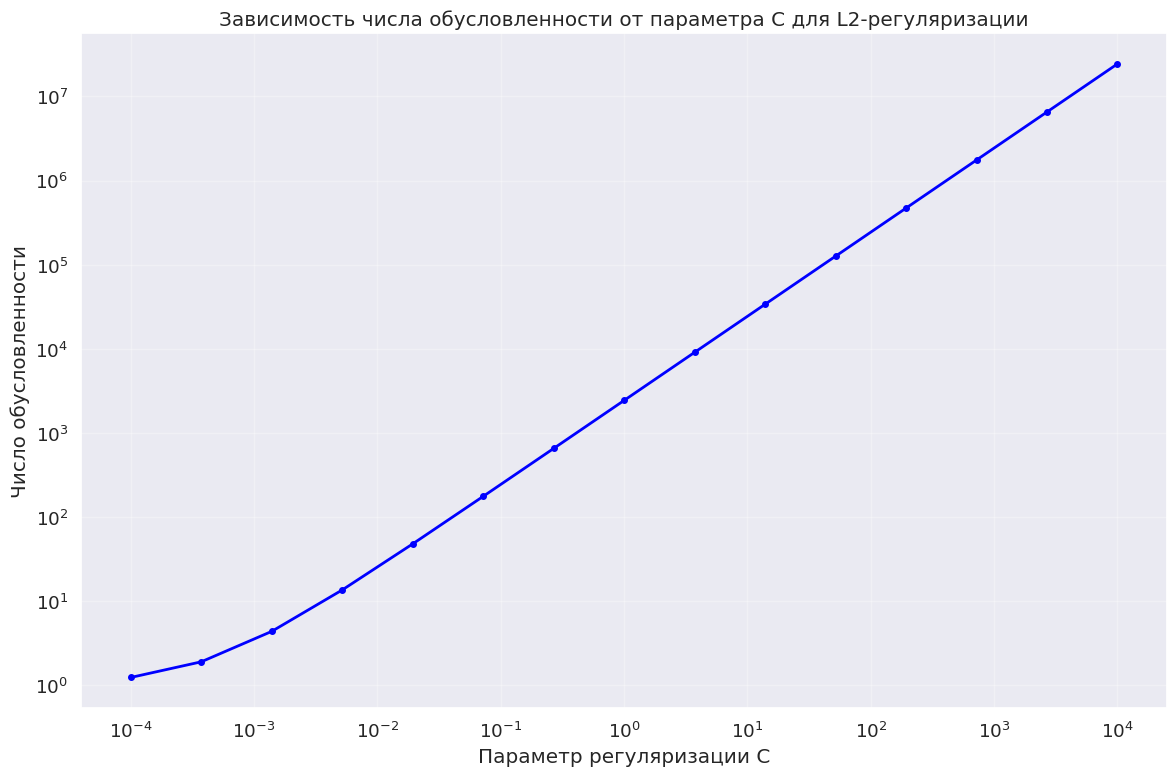

In [175]:
condition_numbers_l2 = []
C_values = results['l2']['C_values']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

XTX = X_train_scaled.T @ X_train_scaled
n_features = XTX.shape[0]

for C in C_values:
    try:
        XTX_reg = XTX + (1/C) * np.eye(n_features)

        condition_number = np.linalg.cond(XTX_reg)
        condition_numbers_l2.append(condition_number)

    except Exception as e:
      print(f"Ошибка при C={C:.2e}: {e}")
      condition_numbers_l2.append(np.nan)

plt.figure(figsize=(12, 8))
plt.plot(C_values, condition_numbers_l2, 'b-', linewidth=2, marker='o', markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Параметр регуляризации C')
plt.ylabel('Число обусловленности')
plt.title('Зависимость числа обусловленности от параметра C для L2-регуляризации')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Сделайте вывод. О чём свидетельствует полученная зависимость?

**Вывод:** с ростом параметра регуляризации С растет число обусловленности, что говорит о хорошей работе регуляризации и улучшении обусловленности, таким образом решается проблема мультиколлениарности биологических признаков.

**4.** **Разброс коэффициентов**

Рассмотрите **2 модели:** логистическая регрессия с $L_2$-регуляризацией при `C=0.01` и с `penalty=None`. Каждую модель обучите 500 раз при различных разбиениях на обучающую и тестову выборки. Сохраните коэффициенты для выбранных ранее признаков. Подсчитайте усреднённую метрику качества и визуализируйте распределение каждого коэффициента. Не забудьте про пайплайн.

> Визуализацию предлагается сделать виде сетки графиков. На каждом изобразите **ядерные оценки плотности** для соответствующего коэффициента обеих моделей.
>
> Также напоминаем про удобство использования [логарифмической шкалы](https://matplotlib.org/stable/api/scale_api.html#builtin-scales).

In [176]:
model_l2 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(C=0.01, penalty='l2', class_weight='balanced', random_state=42, max_iter=1000))
])

model_no_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty=None, class_weight='balanced', random_state=42, max_iter=1000))
])

coefs_l2 = []
coefs_no_reg = []

n_experiments = 500

for i in range(n_experiments):
    X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    model_l2.fit(X_train_bs, y_train_bs)
    coefs_l2.append(model_l2.named_steps['logreg'].coef_[0])

    model_no_reg.fit(X_train_bs, y_train_bs)
    coefs_no_reg.append(model_no_reg.named_steps['logreg'].coef_[0])

coefs_l2 = np.array(coefs_l2)
coefs_no_reg = np.array(coefs_no_reg)

if hasattr(X, 'columns'):
    feature_names = X.columns.tolist()
else:
    feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

n_features = len(feature_names)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

Визуализация

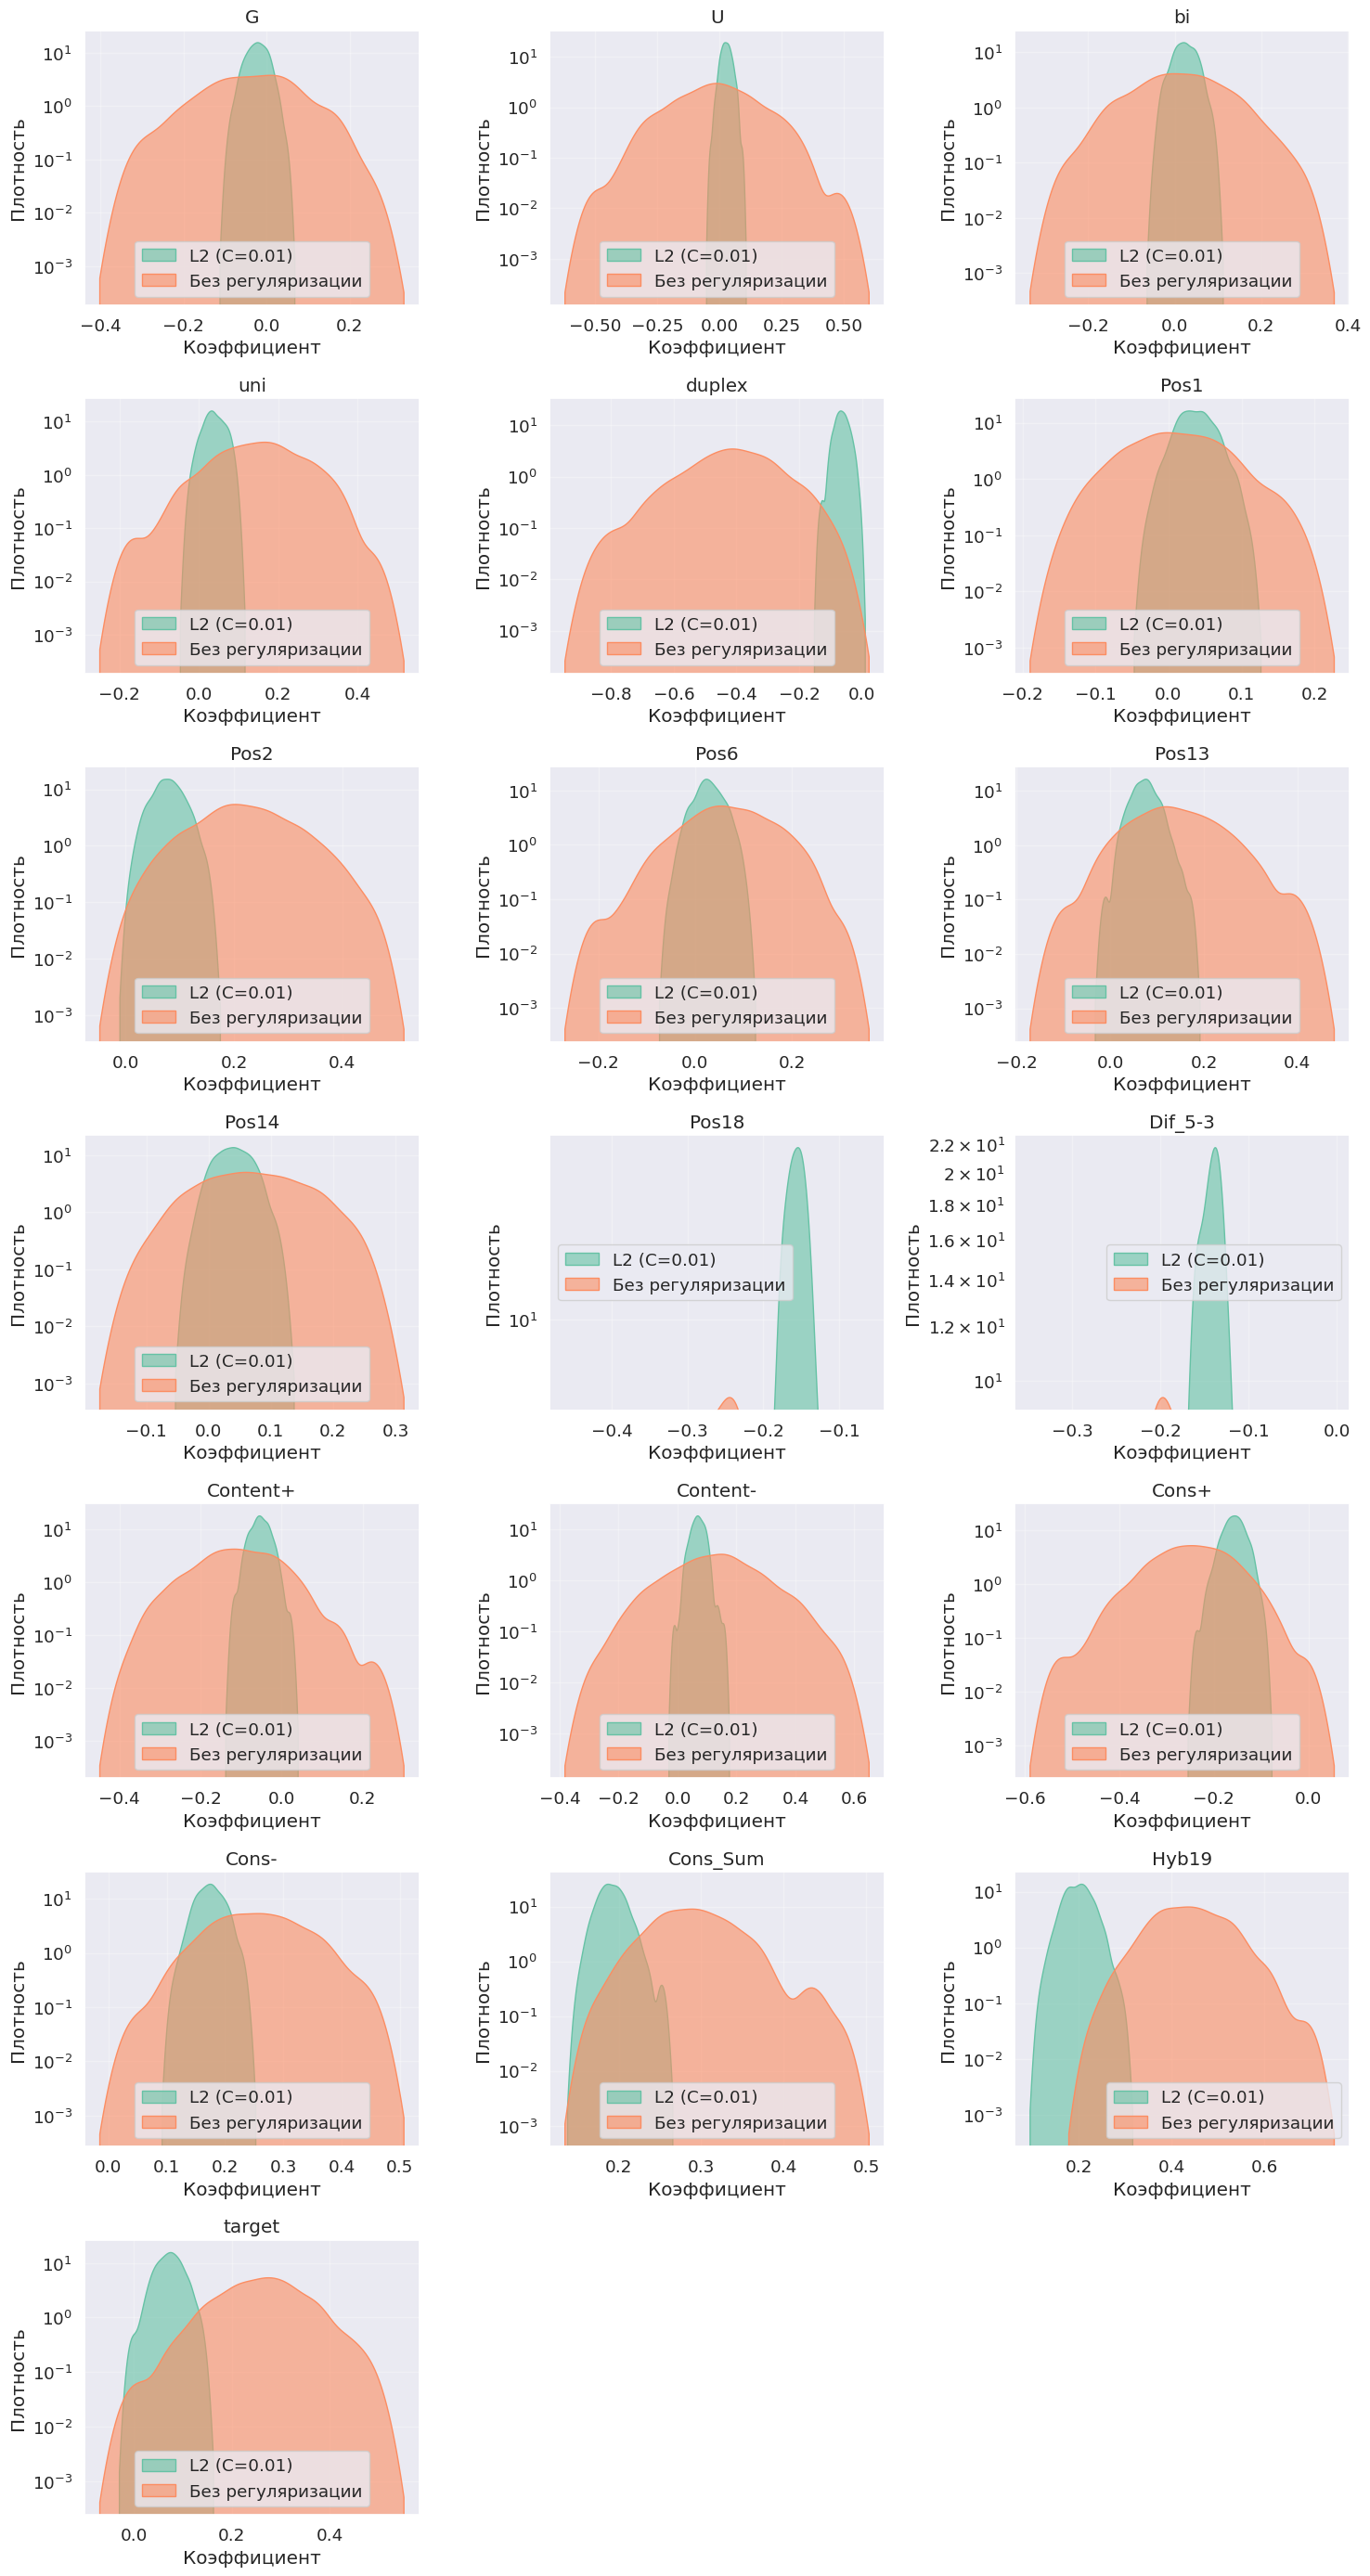

In [177]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i in range(n_features):
    ax = axes[i]
    sns.kdeplot(coefs_l2[:, i], ax=ax, label='L2 (C=0.01)', fill=True, alpha=0.6)
    sns.kdeplot(coefs_no_reg[:, i], ax=ax, label='Без регуляризации', fill=True, alpha=0.6)
    ax.set_title(f'{feature_names[i]}')
    ax.set_xlabel('Коэффициент')
    ax.set_ylabel('Плотность')
    ax.legend()
    ax.set_yscale('log')
    ax.grid(True, alpha=0.3)

for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Какой модели вы больше доверитесь при интерпретации коэффициентов? Почему разработчики sklearn по-умолчанию добавили в логистическую регрессию небольшую $L_2$-регуляризацию? В чём заключается её польза? Порассуждайте над этими вопросами и попробуйте написать интерпретацию выведенных коэффициентов.

**Вывод** лучше использовать L2-регуляризацию, она помогает справиться с мультиколлениарностью и уменьшить переобучение. Наверное именно поэтому разработчики skealern добавили ее по-умолчанию.

Коэффициенты положительные увеличивают вероятность эффективности миРНК, отрицательные - уменьшают; чем ближе к 0, тем меньше влияние.

**Интересные статьи:**

[Червивый путь к Нобелю: история miRNA и больших открытий](https://nplus1.ru/material/2024/10/08/microrna-nobel2024)

---
© 2025 команда <a href="https://thetahat.ru/">ThetaHat</a> для BioMed@DataScience